# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.



## 1. Load and inspect the data

You may use either the car dataset from today's lesson 

1. Load the dataset and inspect it

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import pandas as pd
df = pd.read_csv('../6.05-random-forests/assets/datasets/car.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [37]:
df.shape

(1728, 7)

In [38]:
df.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [39]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [40]:
df.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [41]:
df.dtypes

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
acceptability    object
dtype: object

## 2. Decision Tree Classifier


1. Train a decision tree on the data and estimate the buy likelihood

In [42]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))

In [44]:
cv = StratifiedKFold(Y_train, n_folds=3, shuffle=True, random_state=41)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict_proba(X_test)
Y_plot = dtc.predict(X_test)
print dtc.score(X_test, Y_test)
print cross_val_score(dtc, X_train, Y_train, cv=cv).mean()

Y_pred 

0.943957968476
0.958528686801


array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.]])

In [46]:
Y_plot.shape


(571,)

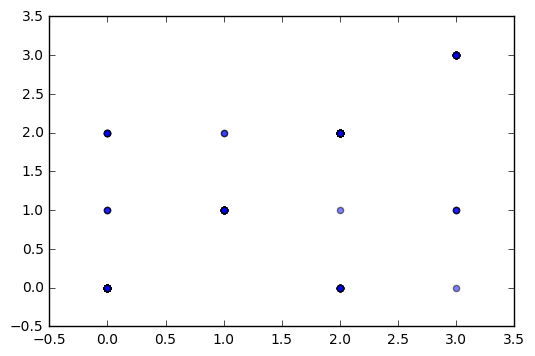

In [47]:
plt.scatter(Y_plot, Y_test, alpha=0.5)
#plotting classification predictions is silly.

## 3. Random Forest Classifier


1. Train a random forest on the data and estimate the acceptability
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?


In [48]:
y = LabelEncoder().fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))

In [49]:
rt = RandomForestClassifier(n_jobs=-1)
rt.fit(X_train, Y_train)
Y_pred = rt.predict(X_test)
print rt.score(X_test, Y_test)
s = cross_val_score(rt, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))

0.92819614711
Random Forest Score:	0.915 ± 0.008


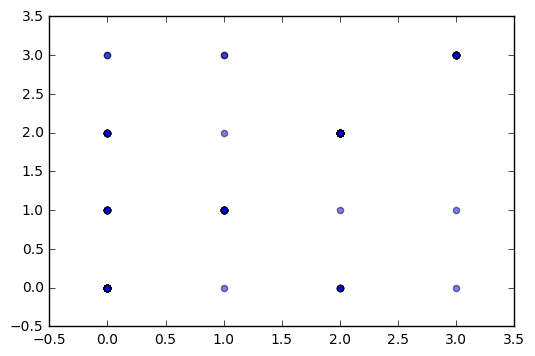

In [50]:
plt.scatter(Y_pred, Y_test,alpha=0.5)
#the plot looks the same

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the acceptability
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [25]:
from sklearn.ensemble import AdaBoostClassifier
#but you mean classifier, right? a regressor doesn't really make sense here

In [26]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))

In [27]:
ada = AdaBoostClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)
ada.fit(X_train, Y_train)
print ada.score(X_test, Y_test)
s = cross_val_score(ada, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Ada Booster", s.mean().round(3), s.std().round(3))

0.835376532399
Ada Booster Score:	0.839 ± 0.022


## 4. Gradient Boosting Trees CLassifier


1. Train a Gradient Boosting Trees on the data and estimate the acceptability
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [29]:
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
print gbc.score(X_test, Y_test)
s = cross_val_score(gbc, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Gradient Boosting Trees Classifier", s.mean().round(3), s.std().round(3))

0.977232924694
Gradient Boosting Trees Classifier Score:	0.965 ± 0.005


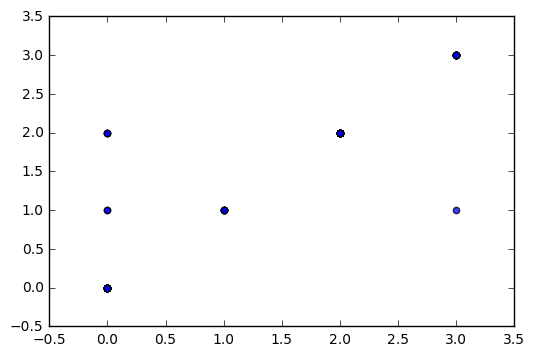

In [30]:
plt.scatter(Y_pred, Y_test, alpha=0.5)

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus:

Take the best model and try to improve it using grid search.

In [32]:
from sklearn.grid_search import GridSearchCV

n_estimators = range(90,100)
max_depth = [1, 2, 3, 4, 5]
subsample = [0.8, 0.9, 1.0]

gbc = GradientBoostingClassifier()

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, subsample=subsample)
grid = GridSearchCV(gbc, param_grid, cv=cv)
grid.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[2 0 ..., 2 2], n_folds=3, shuffle=True, random_state=41),
       error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'subsample': [0.8, 0.9, 1.0], 'max_depth': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [33]:
grid.best_score_

0.99394987035436477

In [34]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 92, 'subsample': 0.8}